In [ ]:
from IPython.display import clear_output

In [ ]:
# Incase you run this notebook outside colab (where the libraries aren't already pre-installed)

%pip install torch
%pip install matplotlib
%pip install scikit-learn

clear_output()

## Task: Predict the median value of houses of california houses using NN (regression)

You are provided with the code to load california housing dataset.

The dataset contains the following features about houses.

- MedInc (Median Income): Median income for households within a district.
- HouseAge: Median age of housing in the district.
- AveRooms: Average rooms per household.
- AveBedrms: Average bedrooms per household.
- Population: Total population in the district.
- AveOccup: Average household occupancy.
- Latitude: Latitude coordinate for the district.
- Longitude: Longitude coordinate for the district.

As for the predicted values, the target is median values of the houses.

Your task is to train a **Neural Network** which takes the features about a house and output it's median value.

Make sure to put emphasis on code quality and to include a measure of how well your final model is performing on untrained data.

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
california_data = fetch_california_housing()

In [ ]:
data_df = pd.DataFrame(california_data.data, columns=california_data.feature_names)

# Print the first few rows of the dataset to see the features
print("Data (features):")
print(data_df.head())

# Print the target values (house values)
print("\nTarget (house values):")
print(california_data.target[:5])

Data (features):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (house values):
[4.526 3.585 3.521 3.413 3.422]


In [ ]:
print(california_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
print(california_data.target_names)

['MedHouseVal']


**Features histograms**

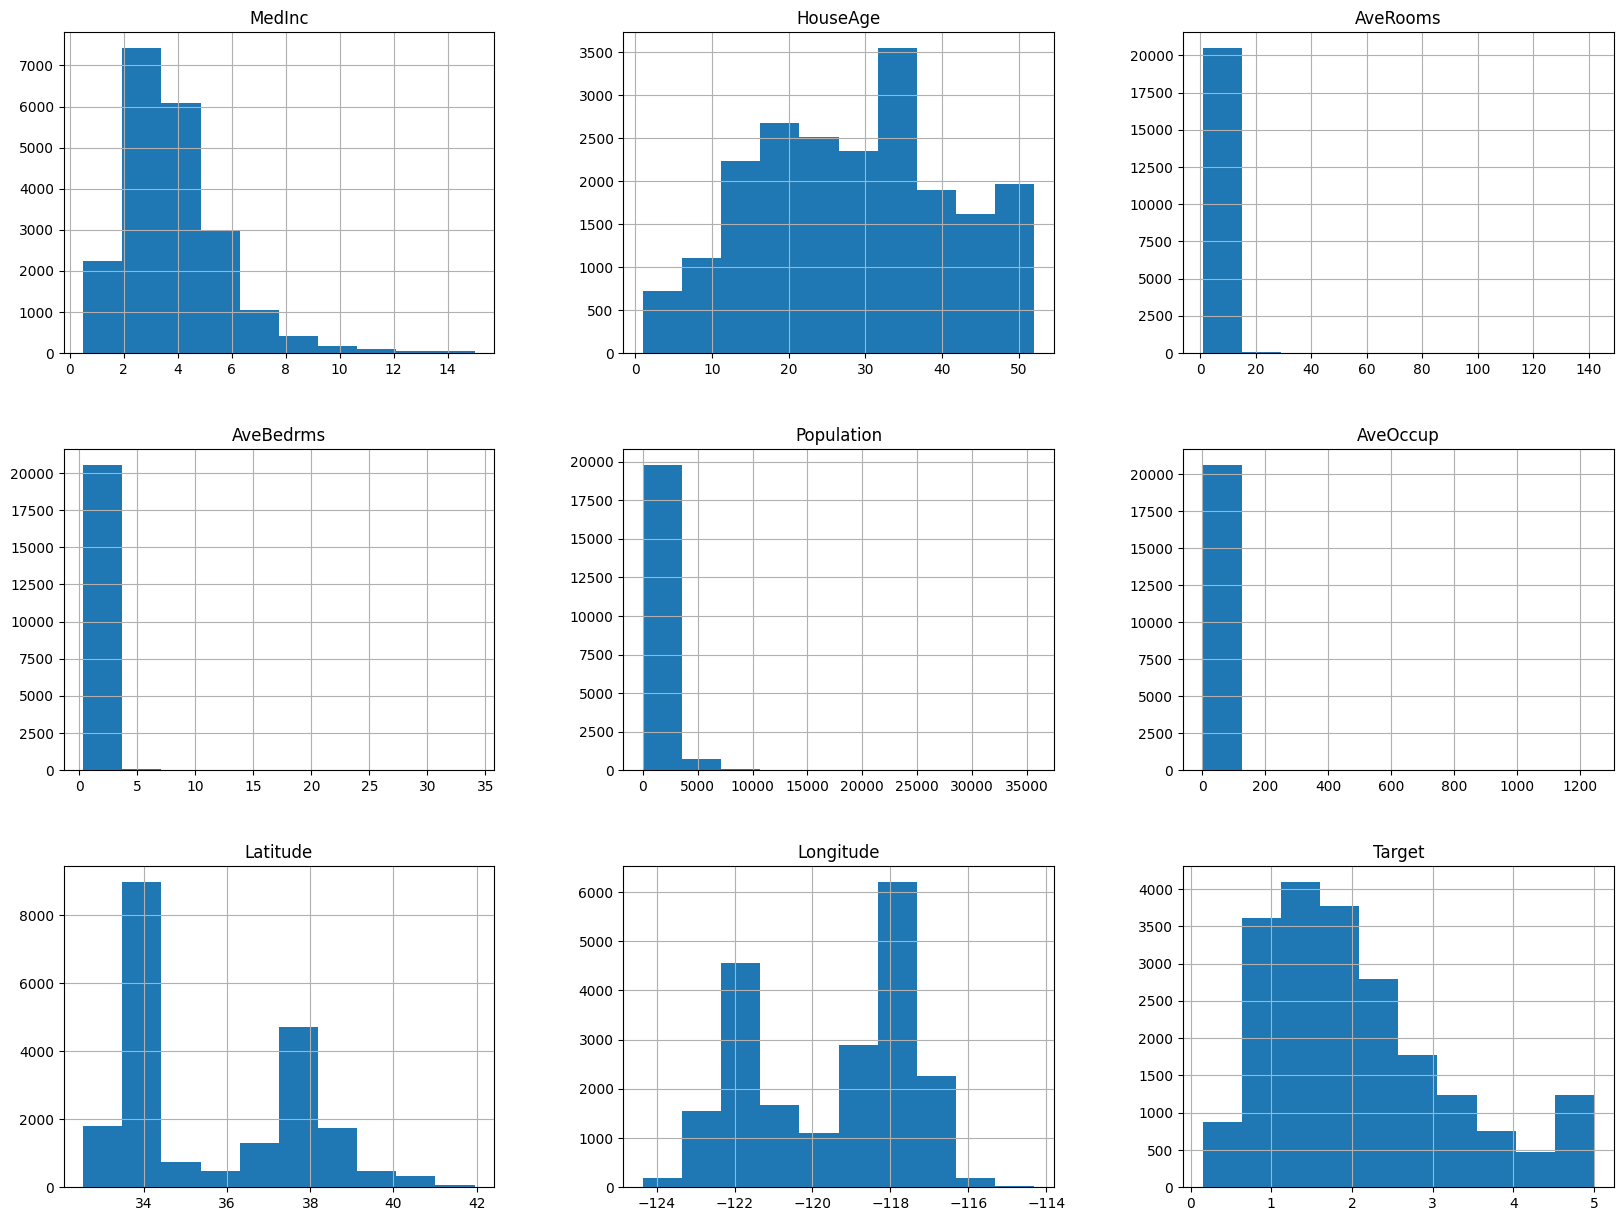

In [ ]:
data_df['Target'] = california_data.target

data_df.hist(bins=10, figsize=(20,15))
plt.show()

**Feature correlations**

In [ ]:
correlation_matrix = data_df.corr()
print("Correlation with the target variable:")
print(correlation_matrix["Target"].sort_values(ascending=False))

print(data_df.head())

Correlation with the target variable:
Target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


**Comment**

The above analysis is based on Pearson correlation coefficient for correlation between the features and the target variable. According to that it is visible that 'MedInc', 'AveRooms', 'HouseAge' and 'Latitude' seem to have a stronger linear correlation with the median value of the houses, whereas 'AveOccup', 'Population', 'Longitude' and 'AveBedrms' have a weaker linear correlation. But this only shows linear correlation. Having said that, the neural network should identify non linear correlations.

**Create testing and training sets and data normalisation**

In [ ]:
X = data_df.drop(columns=['Target']).values
y = data_df['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train, X_test, y_train, y_test = [torch.Tensor(d) for d in [X_train, X_test, y_train, y_test]]

In [ ]:
print(X)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [ ]:
print(y)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
print(X_train.shape)
print(y_train.shape)

torch.Size([14448, 8])
torch.Size([14448])


In [ ]:
import torch
import torch.nn as nn

import time

from torchvision.datasets import EMNIST
import torchvision.transforms.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_tensor
from torch.optim import Adam

import numpy as np

**Neural network class(ReLU, 2 layers)**

In [ ]:
# Simple vanilla NN with two linear layers and ReLu as activation function
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__() # Need to define super constructor as is inheritting from nn class

    # Calling constructor of nn.Module to initialise the nn.Module of our Net class
    self.layer1 = nn.Linear(in_features=input_size, out_features=hidden_size)
    self.layer2 = nn.Linear(in_features=hidden_size, out_features=output_size)

  # This function needs to be called forward. Defines forward pass of network
  def forward(self, x):
    x = self.layer1(x)
    x = nn.functional.relu(x)

    x = self.layer2(x)

    return x

# **Create model and optimizer**

In [ ]:
# Initialize instance of custom Net class
# Input 8 features, 10 neurons for hidden layer, output 1 value
model = Net(8, 200, 1)

# Check if gpu is available to use cuda
device = "cuda" if torch.cuda.is_available() else "cpu"

# Pass model to gpu
model.to(device)

# Initialize Adam optimizer
optimizer = Adam(model.parameters(), lr=1e-4)
# Initialize loss function to be used
criterion = nn.MSELoss()

**Training**

In [ ]:
def train_model(model, criterion, optimizer, X_train, y_train, num_epochs=15, batch_size=64, device='cpu'):
    import time
    import numpy as np

    n_samples = X_train.shape[0]
    n_batches = n_samples // batch_size

    train_loss = []
    model.train()

    start_time = time.time()

    for i in range(num_epochs):
        epoch_loss = []
        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size

            x = X_train[start:end].to(device)
            y = y_train[start:end].to(device)

            # Forward pass
            out = model(x)

            # Calculate loss
            loss = criterion(out, y)

            # Zero previous gradients
            optimizer.zero_grad()
            # Backward pass
            loss.backward()
            # Update weights
            optimizer.step()

            epoch_loss.append(loss.item())

        train_loss.append(np.mean(epoch_loss))
        print(f"Epoch {i}: Loss: {train_loss[-1]}")

    end_time = time.time()
    total_time = end_time - start_time
    print(f"Total training time: {total_time} seconds")

    return train_loss

In [ ]:
def evaluate_model(model, X_test, y_test, device = 'cpu'):
    import torch
    import numpy as np

    model.eval()  # Set the model to evaluation mode

    # Ensure data is on the same device as the model
    X_test = X_test.to(device)
    y_test = y_test.to(device)

    with torch.no_grad():  # Disable gradient computation
        predictions = model(X_test)  # Make predictions

    # Convert predictions and actuals to NumPy arrays for error calculation
    predictions_np = predictions.cpu().numpy()
    y_test_np = y_test.cpu().numpy()

    # Calculate errors
    mae = np.mean(np.abs(predictions_np - y_test_np))
    mse = np.mean((predictions_np - y_test_np) ** 2)
    rmse = np.sqrt(mse)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

    return predictions_np

In [ ]:
train_loss = train_model(model, criterion, optimizer, X_train, y_train, 30)

Epoch 0: Loss: 69.7155429426829
Epoch 1: Loss: 4.285810975498623
Epoch 2: Loss: 3.9210685835944283
Epoch 3: Loss: 3.5314475136333043
Epoch 4: Loss: 3.192150823805067
Epoch 5: Loss: 2.905113121403588
Epoch 6: Loss: 2.692264445092943
Epoch 7: Loss: 2.5203290526072184
Epoch 8: Loss: 2.342189074092441
Epoch 9: Loss: 2.1778136351373463
Epoch 10: Loss: 2.0222732694943746
Epoch 11: Loss: 1.8587353308995564
Epoch 12: Loss: 1.7343235074149237
Epoch 13: Loss: 1.6282726277245416
Epoch 14: Loss: 1.552282197740343
Epoch 15: Loss: 1.5181505868169995
Epoch 16: Loss: 1.4603625660472446
Epoch 17: Loss: 1.4255705693033007
Epoch 18: Loss: 1.4304492407374911
Epoch 19: Loss: 1.4433072802755569
Epoch 20: Loss: 1.4471316411760118
Epoch 21: Loss: 1.4427008202340867
Epoch 22: Loss: 1.4651617664761014
Epoch 23: Loss: 1.5144626206821865
Epoch 24: Loss: 1.5310418555471632
Epoch 25: Loss: 1.5291053989198473
Epoch 26: Loss: 1.5355517482757568
Epoch 27: Loss: 1.5392062142160203
Epoch 28: Loss: 1.543856802781423
Epoc

**Loss graph**

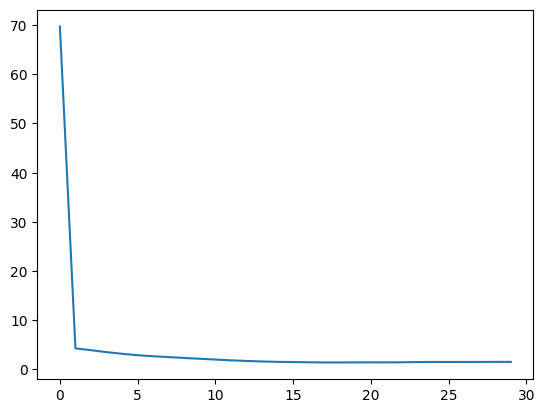

In [ ]:
plt.plot(train_loss)

**Model Performance on test data**

In [ ]:
predictions_np = evaluate_model(model, X_test, y_test)

MAE: 1.26509428024292
MSE: 2.3010103702545166
RMSE: 1.5169081687927246


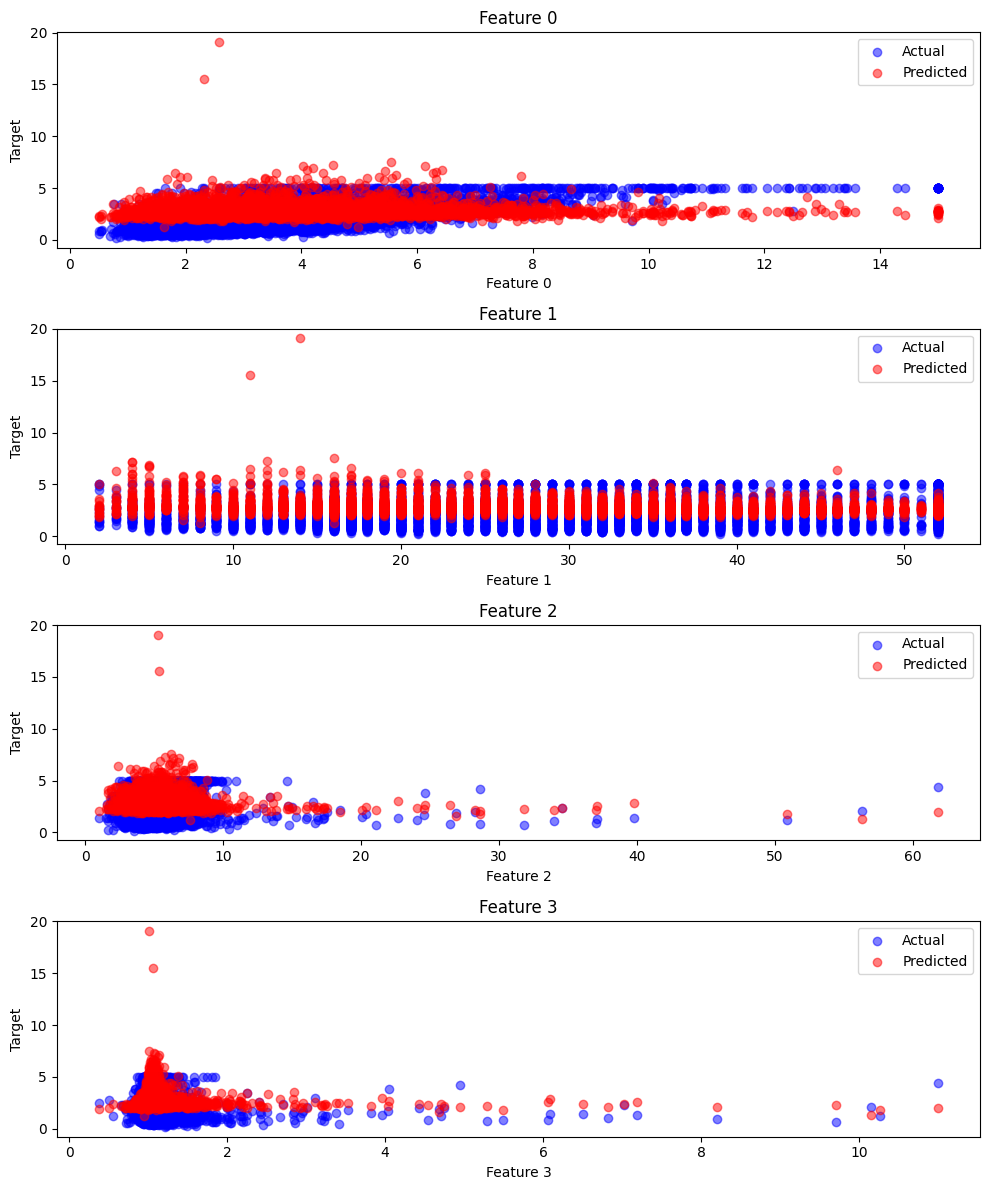

In [ ]:
X_train_np = X_train.numpy()
X_test_np = X_test.numpy()
y_train_np = y_train.numpy()
y_test_np = y_test.numpy()

n_features = 4

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=n_features, ncols=1, figsize=(10, 3*n_features))

for i in range(n_features):
    axes[i].scatter(X_test_np[:, i], y_test_np, color='blue', label='Actual', alpha=0.5)
    axes[i].scatter(X_test_np[:, i], predictions_np, color='red', label='Predicted', alpha=0.5)
    axes[i].set_title(f'Feature {i}')
    axes[i].set_xlabel(f'Feature {i}')
    axes[i].set_ylabel('Target')
    axes[i].legend()

plt.tight_layout()
plt.show()

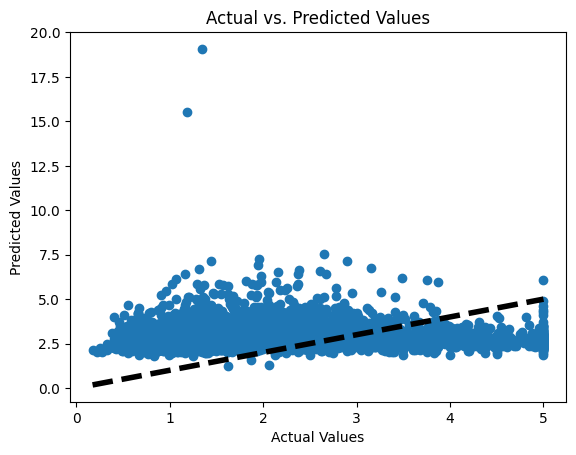

In [ ]:
plt.scatter(y_test, predictions_np)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

**Neural Network class(3 layers, ReLU)**

In [ ]:
class Net(nn.Module):
  def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
    super().__init__() # Need to define super constructor as is inheritting from nn class

    # Calling constructor of nn.Module to initialise the nn.Module of our Net class
    self.layer1 = nn.Linear(in_features=input_size, out_features=hidden_size_1)
    self.layer2 = nn.Linear(in_features=hidden_size_1, out_features=hidden_size_2)
    self.layer3 = nn.Linear(in_features=hidden_size_2, out_features=output_size)

  # This function needs to be called forward. Defines forward pass of network
  def forward(self, x):
    # First layer
    # Pass x as input: linear + non_linear
    x = self.layer1(x)
    x = nn.functional.relu(x)

    x = self.layer2(x)
    x = nn.functional.relu(x)

    x = self.layer3(x)


    return x

**Once again create model and optimizer**

In [ ]:
# Initialize instance of custom Net class
# Input 8 features, 50 neurons for first hidden layer, 20 for second hidden layer, output 1 value
model = Net(8, 100, 50, 1)

# Check if gpu is available to use cuda
device = "cuda" if torch.cuda.is_available() else "cpu"

# Pass model to gpu
model.to(device)

# Initialize Adam optimizer
optimizer = Adam(model.parameters(), lr=1e-4)
# Initialize loss function to be used
criterion = nn.MSELoss()

In [ ]:
train_model(model, criterion, optimizer, X_train, y_train, 30)

Epoch 0: Loss: 2.3967307143741183
Epoch 1: Loss: 1.4643841348754034
Epoch 2: Loss: 1.4846559392081367
Epoch 3: Loss: 1.6198097117741903
Epoch 4: Loss: 1.6163409158918594
Epoch 5: Loss: 1.6052685838275487
Epoch 6: Loss: 1.6808248856332566
Epoch 7: Loss: 1.5937444734573365
Epoch 8: Loss: 1.5830093095037672
Epoch 9: Loss: 1.7495432172881233
Epoch 10: Loss: 1.4994434144761828
Epoch 11: Loss: 1.798684398598141
Epoch 12: Loss: 1.5411807248327467
Epoch 13: Loss: 1.566207971043057
Epoch 14: Loss: 1.605267620616489
Epoch 15: Loss: 1.5942422440316941
Epoch 16: Loss: 1.5705876972940234
Epoch 17: Loss: 1.5946618003315396
Epoch 18: Loss: 1.5860975191328262
Epoch 19: Loss: 1.58985478454166
Epoch 20: Loss: 1.5861368468072679
Epoch 21: Loss: 1.5939234068658616
Epoch 22: Loss: 1.5871994966930814
Epoch 23: Loss: 1.5955168761147394
Epoch 24: Loss: 1.5717320211728414
Epoch 25: Loss: 1.6141683228810628
Epoch 26: Loss: 1.5445043974452548
Epoch 27: Loss: 1.6551781627866957
Epoch 28: Loss: 1.51183640188641
Ep

[2.3967307143741183,
 1.4643841348754034,
 1.4846559392081367,
 1.6198097117741903,
 1.6163409158918594,
 1.6052685838275487,
 1.6808248856332566,
 1.5937444734573365,
 1.5830093095037672,
 1.7495432172881233,
 1.4994434144761828,
 1.798684398598141,
 1.5411807248327467,
 1.566207971043057,
 1.605267620616489,
 1.5942422440316941,
 1.5705876972940234,
 1.5946618003315396,
 1.5860975191328262,
 1.58985478454166,
 1.5861368468072679,
 1.5939234068658616,
 1.5871994966930814,
 1.5955168761147394,
 1.5717320211728414,
 1.6141683228810628,
 1.5445043974452548,
 1.6551781627866957,
 1.51183640188641,
 1.6580719669659933]

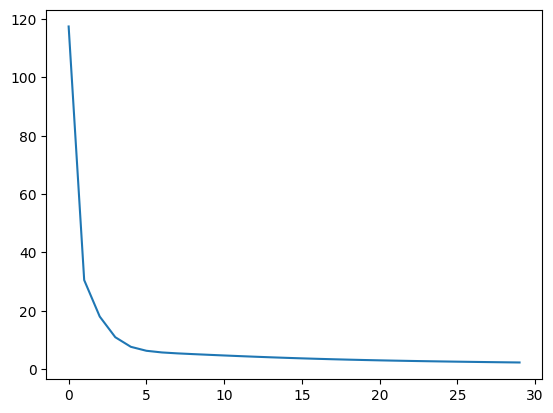

In [ ]:
plt.plot(train_loss)

In [ ]:
evaluate_model(model, X_test, y_test)

MAE: 1.2486565113067627
MSE: 2.264009952545166
RMSE: 1.5046627521514893


array([[2.7036543],
       [3.0344362],
       [3.748681 ],
       ...,
       [3.5460443],
       [2.55511  ],
       [2.8861017]], dtype=float32)

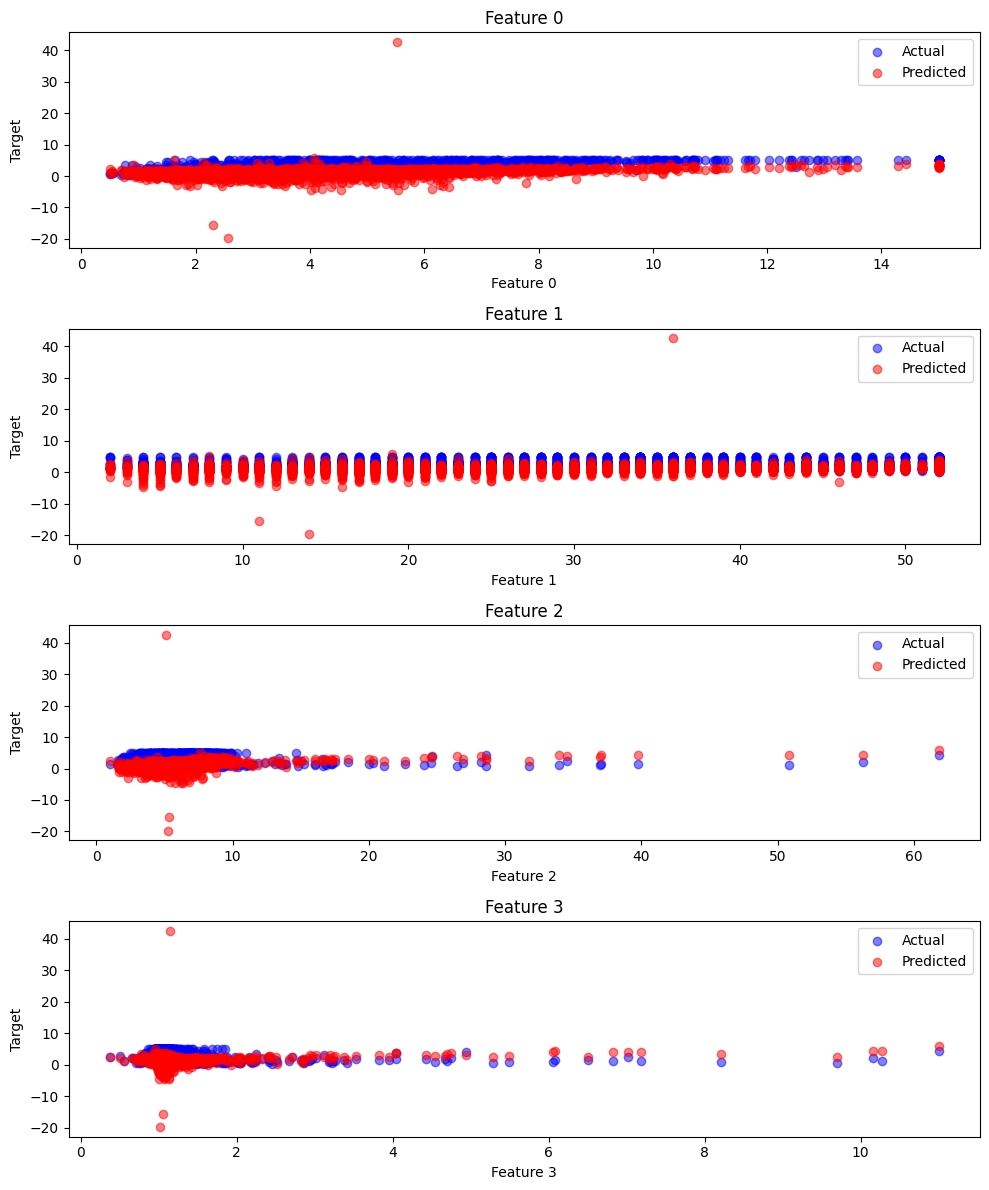

In [ ]:
X_train_np = X_train.numpy()
X_test_np = X_test.numpy()
y_train_np = y_train.numpy()
y_test_np = y_test.numpy()

n_features = 4

fig, axes = plt.subplots(nrows=n_features, ncols=1, figsize=(10, 3*n_features))

for i in range(n_features):
    axes[i].scatter(X_test_np[:, i], y_test_np, color='blue', label='Actual', alpha=0.5)
    axes[i].scatter(X_test_np[:, i], predictions_np, color='red', label='Predicted', alpha=0.5)
    axes[i].set_title(f'Feature {i}')
    axes[i].set_xlabel(f'Feature {i}')
    axes[i].set_ylabel('Target')
    axes[i].legend()

plt.tight_layout()
plt.show()

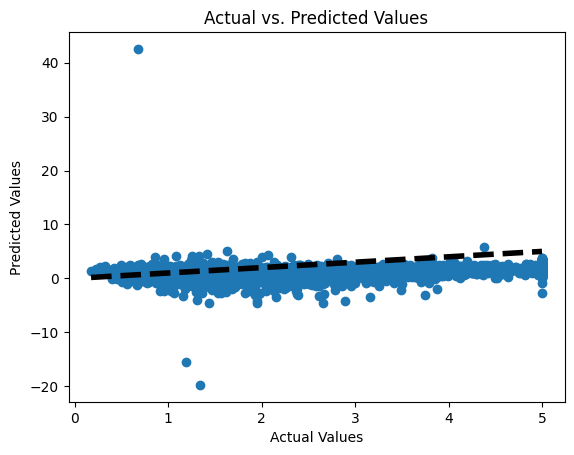

In [ ]:
plt.scatter(y_test, predictions_np)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

**Neural Network Class(4 layers, ReLU)**

In [ ]:
class Net(nn.Module):
  def __init__(self, input_size, hidden_size_1, hidden_size_2, hidden_size_3, output_size):
    super().__init__() # Need to define super constructor as is inheritting from nn class

    # Calling constructor of nn.Module to initialise the nn.Module of our Net class
    self.layer1 = nn.Linear(in_features=input_size, out_features=hidden_size_1)
    self.layer2 = nn.Linear(in_features=hidden_size_1, out_features=hidden_size_2)
    self.layer3 = nn.Linear(in_features=hidden_size_2, out_features=hidden_size_3)
    self.layer4 = nn.Linear(in_features=hidden_size_3, out_features=output_size)

  # This function needs to be called forward. Defines forward pass of network
  def forward(self, x):
    # First layer
    # Pass x as input: linear + non_linear
    x = self.layer1(x)
    x = nn.functional.relu(x)

    x = self.layer2(x)
    x = nn.functional.relu(x)

    x = self.layer3(x)
    x = nn.functional.relu(x)

    x = self.layer4(x)


    return x

In [ ]:
model = Net(8, 200, 100, 50, 1)

# Check if gpu is available to use cuda
device = "cuda" if torch.cuda.is_available() else "cpu"

# Pass model to gpu
model.to(device)

# Initialize Adam optimizer
optimizer = Adam(model.parameters(), lr=1e-4)
# Initialize loss function to be used
criterion = nn.MSELoss()

In [ ]:
train_model(model, criterion, optimizer, X_train, y_train, 30)

Epoch 0: Loss: 22.71743412706587
Epoch 1: Loss: 1.379305232365926
Epoch 2: Loss: 1.3683184223704867
Epoch 3: Loss: 1.3625697708129882
Epoch 4: Loss: 1.364872743818495
Epoch 5: Loss: 1.371146932442983
Epoch 6: Loss: 1.3793636417388917
Epoch 7: Loss: 1.3855954715940688
Epoch 8: Loss: 1.3911380155881246
Epoch 9: Loss: 1.3902084493637086
Epoch 10: Loss: 1.3970925871531168
Epoch 11: Loss: 1.3978508898946973
Epoch 12: Loss: 1.3865318587091233
Epoch 13: Loss: 1.3907861659261915
Epoch 14: Loss: 1.4096425053808423
Epoch 15: Loss: 1.4254677494366963
Epoch 16: Loss: 1.4337720722622342
Epoch 17: Loss: 1.4400938288370768
Epoch 18: Loss: 1.4258695265981887
Epoch 19: Loss: 1.4149864996804131
Epoch 20: Loss: 1.408153477774726
Epoch 21: Loss: 1.4085736346244813
Epoch 22: Loss: 1.414481615755293
Epoch 23: Loss: 1.4183351919386122
Epoch 24: Loss: 1.4202584399117364
Epoch 25: Loss: 1.4189493163426716
Epoch 26: Loss: 1.4167206202612983
Epoch 27: Loss: 1.4159435775544909
Epoch 28: Loss: 1.4566308567259048
E

[22.71743412706587,
 1.379305232365926,
 1.3683184223704867,
 1.3625697708129882,
 1.364872743818495,
 1.371146932442983,
 1.3793636417388917,
 1.3855954715940688,
 1.3911380155881246,
 1.3902084493637086,
 1.3970925871531168,
 1.3978508898946973,
 1.3865318587091233,
 1.3907861659261915,
 1.4096425053808423,
 1.4254677494366963,
 1.4337720722622342,
 1.4400938288370768,
 1.4258695265981887,
 1.4149864996804131,
 1.408153477774726,
 1.4085736346244813,
 1.414481615755293,
 1.4183351919386122,
 1.4202584399117364,
 1.4189493163426716,
 1.4167206202612983,
 1.4159435775544909,
 1.4566308567259048,
 1.4173384149869284]

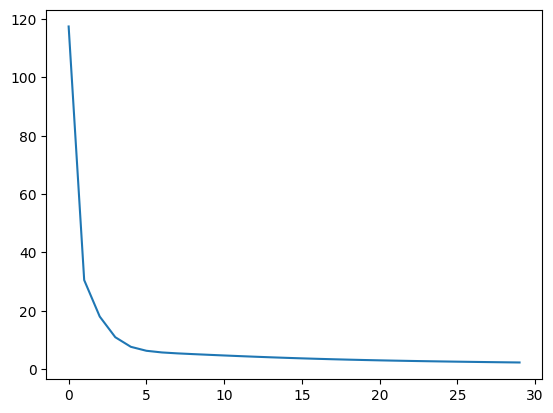

In [ ]:
plt.plot(train_loss)

In [ ]:
evaluate_model(model,X_test, y_test)

MAE: 0.9584137797355652
MSE: 1.3826617002487183
RMSE: 1.1758663654327393


array([[2.2492561],
       [2.268807 ],
       [2.4175444],
       ...,
       [2.3963661],
       [2.1792264],
       [2.2722797]], dtype=float32)

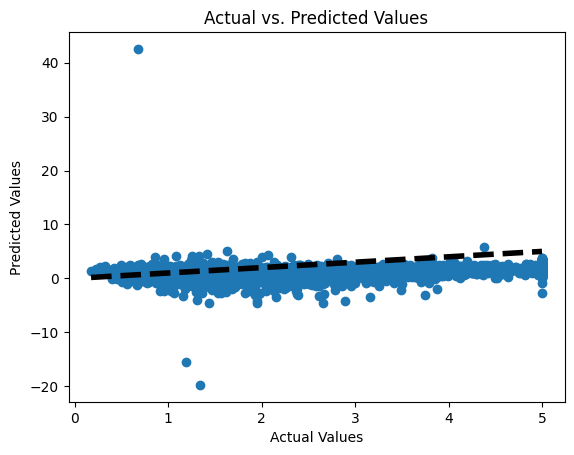

In [ ]:
plt.scatter(y_test, predictions_np)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

**Comment**

It seems the model is making good predictions without dropping any of the features which are not linearly correlated with the target variable. That is expected because the non linear correlations of the data should be picked up by the neural network. Another interesting feature of the network was that increasing the number of neurons: in some scenarios increasing the number of neurons from 20 to 50 and from 50 to 100 and to 200 gave a smaller RMSE for almost all the architectures of the network. Also using a lower learning rate(eg 1e-4 or lower) probably even caused the method to get stuck in a local minima since the predictions became closer to the mean value. Moreover experimenting more with the number of hidden layers didn't seem to have any significant effect on the predictions for the same number of neurons. This would suggest that the main features and correlations between the data are learned during the first layer and the next don't really contribute anything to the learning process.  